In [1]:
pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
file_path = 'D:\stockmarketpreddiction\AAPL Historical Data.csv'
df = pd.read_csv(file_path)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values('Date', inplace=True)

In [7]:
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

In [8]:
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

In [9]:
X = df[['Day']]
y = df['Price']


In [10]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [11]:
future_days = 30
last_day = df['Day'].max()
future_X = np.arange(last_day + 1, last_day + 1 + future_days).reshape(-1, 1)
predictions = model.predict(future_X)

D:\anaconda3\anaconda_1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=future_days)
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': predictions})

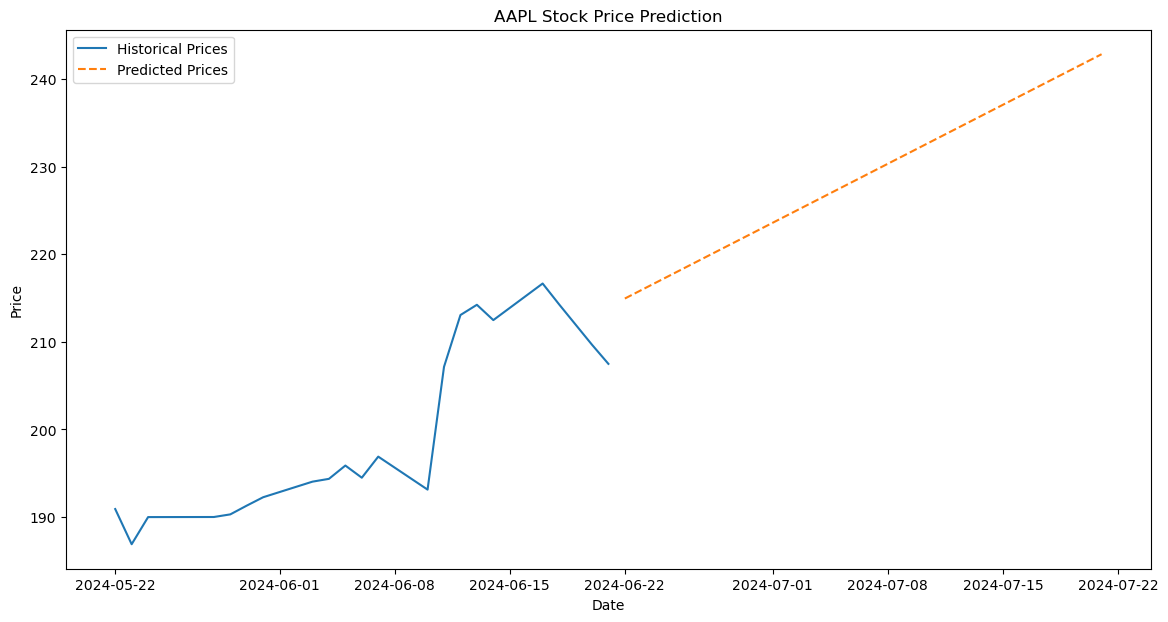

         Date  Predicted_Price
0  2024-06-22       214.954400
1  2024-06-23       215.917066
2  2024-06-24       216.879732
3  2024-06-25       217.842397
4  2024-06-26       218.805063
5  2024-06-27       219.767729
6  2024-06-28       220.730395
7  2024-06-29       221.693061
8  2024-06-30       222.655727
9  2024-07-01       223.618392
10 2024-07-02       224.581058
11 2024-07-03       225.543724
12 2024-07-04       226.506390
13 2024-07-05       227.469056
14 2024-07-06       228.431722
15 2024-07-07       229.394388
16 2024-07-08       230.357053
17 2024-07-09       231.319719
18 2024-07-10       232.282385
19 2024-07-11       233.245051
20 2024-07-12       234.207717
21 2024-07-13       235.170383
22 2024-07-14       236.133049
23 2024-07-15       237.095714
24 2024-07-16       238.058380
25 2024-07-17       239.021046
26 2024-07-18       239.983712
27 2024-07-19       240.946378
28 2024-07-20       241.909044
29 2024-07-21       242.871709


In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Historical Prices')
plt.plot(pred_df['Date'], pred_df['Predicted_Price'], label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()


print(pred_df)